# Lab 5 Life in the Phase Plane and the Relaxation Oscillator


> Yujia, Ethan, and Vincent adapted from materials developed by Diane and Elizabeth
> 
> 2024/4/25 (Week 6)

Edit this document directly. As you go through the notebooks you will find numbered questions. Please answer in the cells provided. 
   
This is an individual assignment, but you are allowed (encouraged!) to work together in groups and discuss coding and
answers. That said, you are responsible for all the material in this laboratory assignment. **DO NOT
COPY from anyone that you work with.** You are **NOT** allowed to share code. You need to write the code
and answer the questions yourself. Try the coding yourself first before seeking help.

<div class="alert alert-info" role="alert">

Please rename your notebook to `Lastname_Firstname_prelab#` and export it as HTML for submission

__Total Points 30__

__Due: 4/25 Thursday 1:30 pm (week 6)__ 
</div> 

If you have any questions, please do not hesitate to ask. You can find the emails and office hours of your instructors and TAs on Canvas. Best of luck!

Feel free to go to the Quantitative Biosciences Center for help! 
[https://college.uchicago.edu/academics/quantitative-biosciences-center](https://college.uchicago.edu/academics/quantitative-biosciences-center) 


<div class="alert alert-warning" role="warning">

Total points = 27

1.1 = 3' Changing $\alpha_X$ and $\beta_X$ keeping the same ratio 1'. Vector field and nullclines 1'. Trajectories 1'

1.2 = 1'

1.3 = 2'

1.4 = 1'

1.5 = 4' Each plot is worth 1'. The student has to show trajectories going to both attractors when $\beta_0 = 0.1$ to get another point.

1.6 = 1'

2.1 = 1'

2.2 = 3' The vector field and nullclines 1'. The trajectory in the phase plane 1' and in time domains 1'

2.3 = 2' Plot 1'. Answer the question 1'

2.4 = 2' The student has to have trajectories going to both attractors to get full points

3.1 = 3' The vector field and nullclines 1'. The trajectory in the phase plane 1' and in time domains 1'

3.2 = 3' Integrating using SDE 1'. Showing stochastic pulsing in the phase plane and time-domain plots 2'

3.3 = 1'
    
</div>




## Part 1 Play with Parameters of the Double Positive Loop


Let’s continue our investigation into the dynamics of the double-positive loop


<img src="https://github.com/dschnitkey/BIOS20236/blob/main/pospos%20circuit.png?raw=true" alt= “” width="300px"/>


$$
\begin{align}
\frac{dX}{dt} &= \beta_X \frac{Y^n}{Y^n + K_X^n} - \alpha _X X\\
\frac{dY}{dt} &= \beta_Y \frac{X^m}{X^m + K_Y^m} - \alpha _Y Y
\end{align}
$$

We'll use the parameters from the Prelab as the starting point

$$
\begin{align}
\beta_X &= \beta_Y = 2\\
\alpha_X &= \alpha_Y = 1\\
K_X &= 0.8\\
K_Y &= 1\\
n &= 4\\
m &= 6
\end{align}
$$

__1.1 (3')__
Change the value of __two parameters__ to make the $X$ dynamics much faster than the $Y$ dynamics without changing the nullclines. Print out which parameters you've changed.

In the phase plane plot the following things after changing the parameters: 
(a) The vector field, (b) the X- and Y-nullclines, and (c) 6 trajectories with different initial conditions that go to both attractors.
Limit both the X- and Y-axis between 0 and 3.
In this question, you don't have to plot the time-domain trajectories

Hints:

1) Recall what determines the _response time_ in the case of a simply regulated gene. E.g. at a given $Y$ value, the dynamics of $X$ here can be understood as a simply regulated gene model. You will want a faster dynamics for $X$ which means a shorter response time.
2) Finding the nullclines analytically may help you determine which two parameters to change together to keep the nullclines unchanged - See the Prelab video part 1
3) This question is similar to Prelab task 2.6 in terms of the plotting techniques. Feel free to reuse the code!



beta_X = 20  The original value is 2
alpha_X = 10  The original value is 1


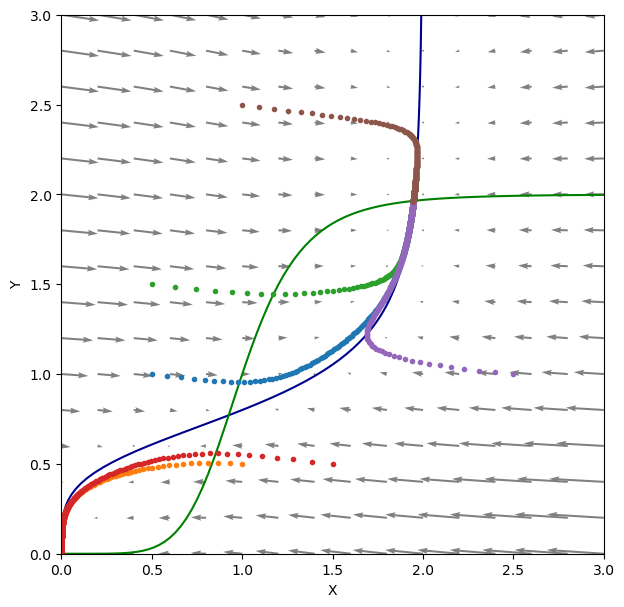

In [1]:
# libraries
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

# RHS function of the double positive loop
def rhs_dp(XY, t, bX, bY, n, m, KX, KY, aX, aY):
    X,Y = XY
    dXdt = bX*(Y**n)/(Y**n + KX**n) - aX*X
    dYdt = bY*(X**m)/(X**m + KY**m) - aY*Y
    return dXdt, dYdt 

# your solution 1.1

# parameters
bX = 20
bY = 2
aX = 10
aY = 1
KX = 0.8
KY = 1
n = 4
m = 6

print("beta_X =", bX, " The original value is", 2)
print("alpha_X =", aX, " The original value is", 1)

# Initialize the figures
p, ax = plt.subplots(figsize=(7, 7))

# Vector field
X_vec = np.linspace(0, 3, 16)
Y_vec = np.linspace(0, 3, 16)
X, Y = np.meshgrid(X_vec, Y_vec)
dXdt, dYdt = rhs_dp([X, Y], None, bX, bY, n, m, KX, KY, aX, aY)

ax.quiver(X, Y, dXdt, dYdt, color="gray")

# Nullclines
X_vec2 = np.linspace(0, 3, 101)
Y_vec2 = np.linspace(0, 3, 101)
X2, Y2 = np.meshgrid(X_vec2, Y_vec2)
dXdt2, dYdt2 = rhs_dp([X2, Y2], None, bX, bY, n, m, KX, KY, aX, aY)

ax.contour(X2, Y2, dXdt2, [0], colors=["darkblue"])
ax.contour(X2, Y2, dYdt2, [0], colors=["green"])

# Trajectories
tspan = np.linspace(0, 10, 1001)
args = (bX, bY, n, m, KX, KY, aX, aY)

XY0_vec = [[0.5, 1.0], [1.0, 0.5], [0.5, 1.5], [1.5, 0.5], [2.5, 1.0], [1.0, 2.5]]
for X0, Y0 in XY0_vec:
    sol = odeint(rhs_dp, [X0, Y0], tspan, args)
    ax.plot(sol[:, 0], sol[:, 1], '.')

ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

__1.2 (1')__ Based on your 1.1 plot, does the basins of attraction change? Which nullcline do the trajectories follow when they are close to the attractors?

__Edit this cell to include your answer__

Yes the basins of attraction change.

X-nullcline (the fast one)

__1.3 (2') Basal transcription rate.__ Return to the original parameter values.
Now, add a constant basal transcription/production term $\beta_0$ to the $dX/dt$ equation.
Define a new RHS function.

Then, loop through different values of $\beta_0$ from 0.1 to 1.1 in steps of 0.2 (i.e. 0.1, 0.3, ..., 1.1).
Overlay the nullclines with different $\beta_0$ values.



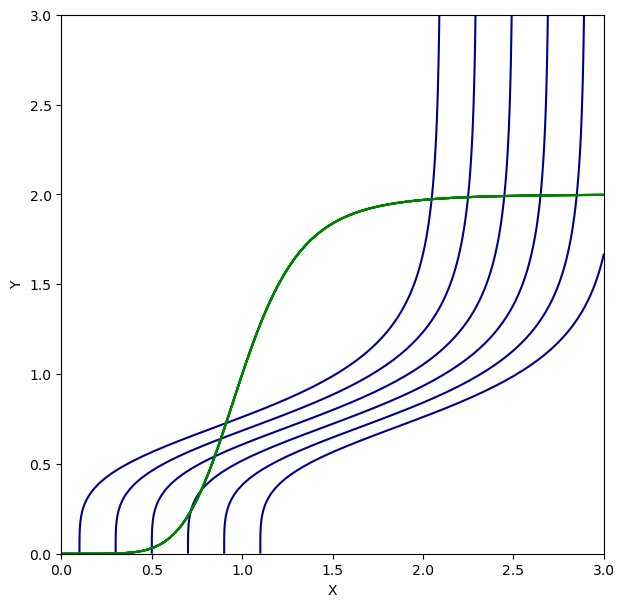

In [2]:
# your solution 1.3

# RHS function of the double positive loop
def rhs_dp2(XY, t, b0, bX, bY, n, m, KX, KY, aX, aY):
    X,Y = XY
    dXdt = b0 + bX*(Y**n)/(Y**n + KX**n) - aX*X
    dYdt = bY*(X**m)/(X**m + KY**m) - aY*Y
    return dXdt, dYdt 

# parameters
bX = 2
bY = 2
aX = 1
aY = 1
KX = 0.8
KY = 1
n = 4
m = 6

b0_vec = np.arange(0.1, 1.3, 0.2)

# Initialize the figures
p, ax = plt.subplots(figsize=(7, 7))


# Nullclines
X_vec2 = np.linspace(0, 3, 101)
Y_vec2 = np.linspace(0, 3, 101)
X2, Y2 = np.meshgrid(X_vec2, Y_vec2)

for b0 in b0_vec:
    dXdt2, dYdt2 = rhs_dp2([X2, Y2], None, b0, bX, bY, n, m, KX, KY, aX, aY)

    ax.contour(X2, Y2, dXdt2, [0], colors=["darkblue"])
    ax.contour(X2, Y2, dYdt2, [0], colors=["green"])    # Y-nullclines will overlap with each other


ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

__1.4 (1')__ Among the different values of $\beta_0$ you used in 1.3, which value is the  closest to the _bifurcation point_?

Recall that the qualitative picture of a system changes around the bifurcation point.
Reading from the nullclines, a qualitative change happens when the _number of intersections_ between the X- and Y- nullclines changes.

__Edit this cell to include your answer__

$\beta_0 = 0.7$

__1.5 (4')__ __In this question you will plot three separate phase portraits.__

Each phase portrait will use a different value of $\beta_0$. Please use $\beta_0 = 0.1$, $1.1$, and the value that you identified in Task 1.4.
Please put the value of $\beta_0$ in your figure title.

Each "phase portrait" will include three components: __the vector field, nullclines, and trajectories__.
In each phase portrait, you should plot 6 trajectories starting from different initial conditions. You want to strategically spread out your initial conditions in the phase plane e.g. you don't want all trajectories to start from a tiny space in the bottom left corner.
__Set limits for X and Y from 0 to 4__.

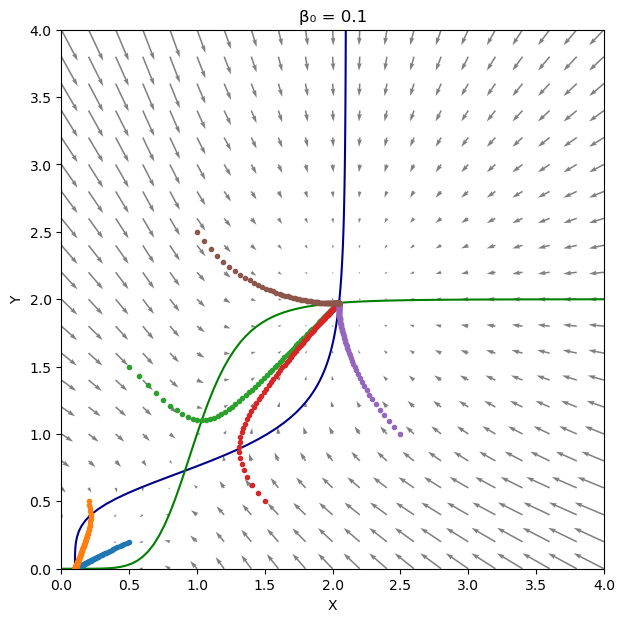

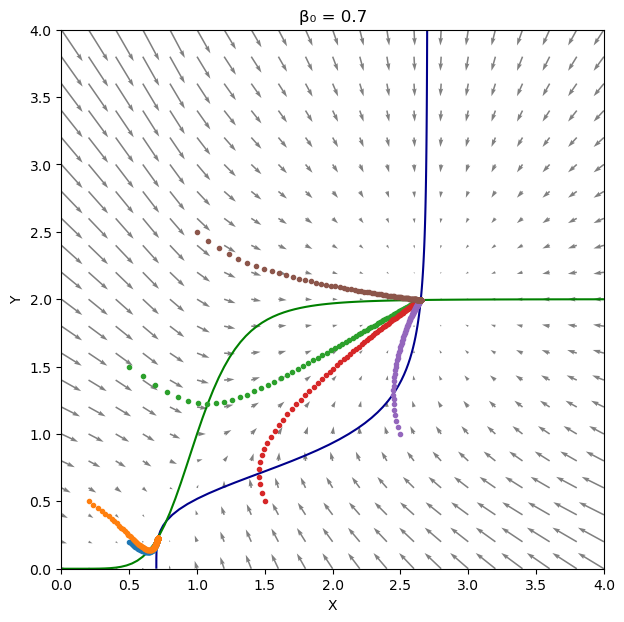

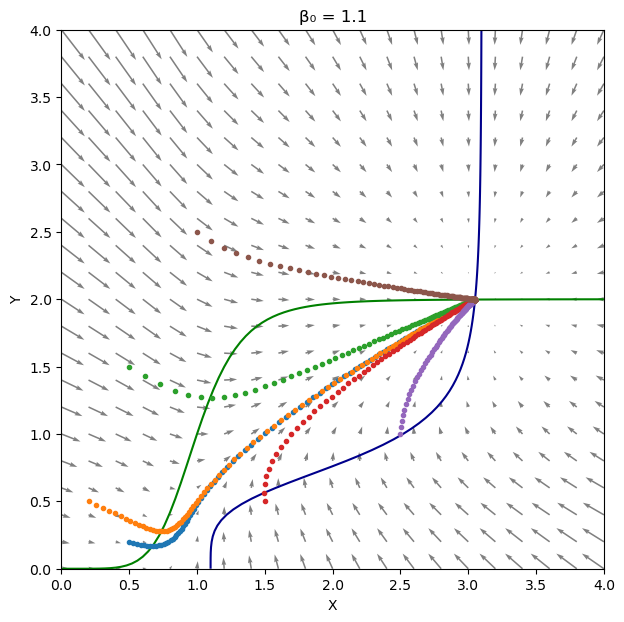

In [3]:
# your solution 1.5

# parameters
bX = 2
bY = 2
aX = 1
aY = 1
KX = 0.8
KY = 1
n = 4
m = 6

b0_vec = [0.1, 0.7, 1.1]

for b0 in b0_vec:
    # Initialize the figures
    p, ax = plt.subplots(figsize=(7, 7))
    
    # Vector field
    X_vec = np.linspace(0, 4, 21)
    Y_vec = np.linspace(0, 4, 21)
    X, Y = np.meshgrid(X_vec, Y_vec)
    dXdt, dYdt = rhs_dp2([X, Y], None, b0, bX, bY, n, m, KX, KY, aX, aY)
    
    ax.quiver(X, Y, dXdt, dYdt, color="gray")
    
    # Nullclines
    X_vec2 = np.linspace(0, 4, 101)
    Y_vec2 = np.linspace(0, 4, 101)
    X2, Y2 = np.meshgrid(X_vec2, Y_vec2)
    dXdt2, dYdt2 = rhs_dp2([X2, Y2], None, b0, bX, bY, n, m, KX, KY, aX, aY)
    
    ax.contour(X2, Y2, dXdt2, [0], colors=["darkblue"])
    ax.contour(X2, Y2, dYdt2, [0], colors=["green"])
    
    # Trajectories
    tspan = np.linspace(0, 10, 201)
    args = (b0, bX, bY, n, m, KX, KY, aX, aY)
    
    XY0_vec = [[0.5, 0.2], [0.2, 0.5], [0.5, 1.5], [1.5, 0.5], [2.5, 1.0], [1.0, 2.5]]
    for X0, Y0 in XY0_vec:
        sol = odeint(rhs_dp2, [X0, Y0], tspan, args)
        ax.plot(sol[:, 0], sol[:, 1], '.')
    
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"β₀ = {b0}")
    plt.show()

__1.6 (1')__ Based on your 1.4 figures, at which value(s) of $\beta_0$ does the system __lose bistability__?

__Edit the cell to include your answer__

$\beta_0 = 1.1$

$\beta_0 = 0.7$ is an interesting case. As it is so close to the bifurcation point, you almost have a weird attractor with 3 stable manifolds and 1 unstable manifold (similar to a half-stable equilibrium in 1D).

## Part 2 The Relaxation Oscillator 

Now we’ll study the rich dynamics that can come from mixing positive and negative feedback loops on different timescales. We saw a good experimental example of this in the lecture with the __ComK-ComS__
 system that regulates _B. subtilis_ entry into competence.

Let’s start with the following system:

<img src="https://github.com/dschnitkey/BIOS20236/blob/main/relaxosc.png?raw=true" alt= “” width="300">

$$
\begin{align}
\frac{dX}{dt} &= Y + \beta_x \frac{X^n}{X^n + K^n} - \alpha_x X\\
\frac{dY}{dt} &= \beta_y \frac{L^m}{X^m + L^m} - \alpha_y Y
\end{align}
$$

By the way, in this model activation from X and Y and auto-actiation from X combine additively. That's additional information we need to assume that you can’t just read off from the diagram.

As a starting point, we will use the following parameters:

$$
\begin{align}
\beta_X &= 4\\
\beta_Y &= 1\\
\alpha_X &= 5\\
\alpha_Y &= 0.3\\
K &= 0.5\\
L &= 0.3\\
n &= 3\\
m &= 4
\end{align}
$$

In [4]:
from matplotlib import pyplot as plt

def my_axes(figsize=(9, 9)):
    
    p, ax = plt.subplots(2, 2, figsize=figsize, gridspec_kw={'height_ratios': (3, 1),'width_ratios': (3, 1)},
                        sharex="col", sharey="row")

    # axis labels
    ax[0][0].set_xlabel("")
    ax[0][0].set_ylabel("")

    ax[0][1].set_ylabel("[Y]", rotation=0, labelpad=10.)
    ax[0][1].yaxis.set_label_position("right")
    ax[1][0].set_xlabel("[X]")
    ax[0][1].set_xlabel("Time")
    ax[0][1].xaxis.set_label_position("top")
    ax[1][0].set_ylabel("Time")

    # invert time of the bottom graph
    ax[1][0].invert_yaxis()

    # nothing on the bottom right
    ax[1][1].axis("off")

    # orient the axes
    ax[0][0].tick_params(axis="x", labeltop=True, bottom=False, top=True)
    ax[0][1].tick_params(axis="x", labeltop=True, bottom=False, top=True)
    ax[0][1].tick_params(axis="y", labelright=True, left=False, right=True)

    # reduce padding
    p.subplots_adjust(wspace=0.1, hspace=0.1)

    return p, ax

__2.1 (1')__ Judging from the parameters alone, what do you guess would be the __fast direction__ ($X$ or $Y$)?

__Edit the cell to include your answer__

$X$ is the fast direction because $\alpha_X >> \alpha_Y$

__2.2 (3') The relaxation oscillator in the phase plane and as trajectories against time.__ Write down the right-hand side function of the relaxation oscillator.

First, run the cell above. Use the function `my_axes` to generate a phase plane side-by-side with a blank X-t plot and a blank Y-t plot.
Then, plot

1. The vector field
2. Nullclines
3. Trajectory in the phase plane, in the X-t space and Y-t space with initial condition $X_0 = 1$, $Y_0 = 1$
(You should integrate for a long enough time so that it oscillates for at least one cycle)

Set your X- and Y-axis to range from 0 to 1.2. You will find that the only attractor in the system is a __limit cycle__, i.e., after enough time no matter what the initial condition is (except at the unstable steady state) the system will follow around the cycle forever. As you've learned in class, such behavior is known as __oscillation__.


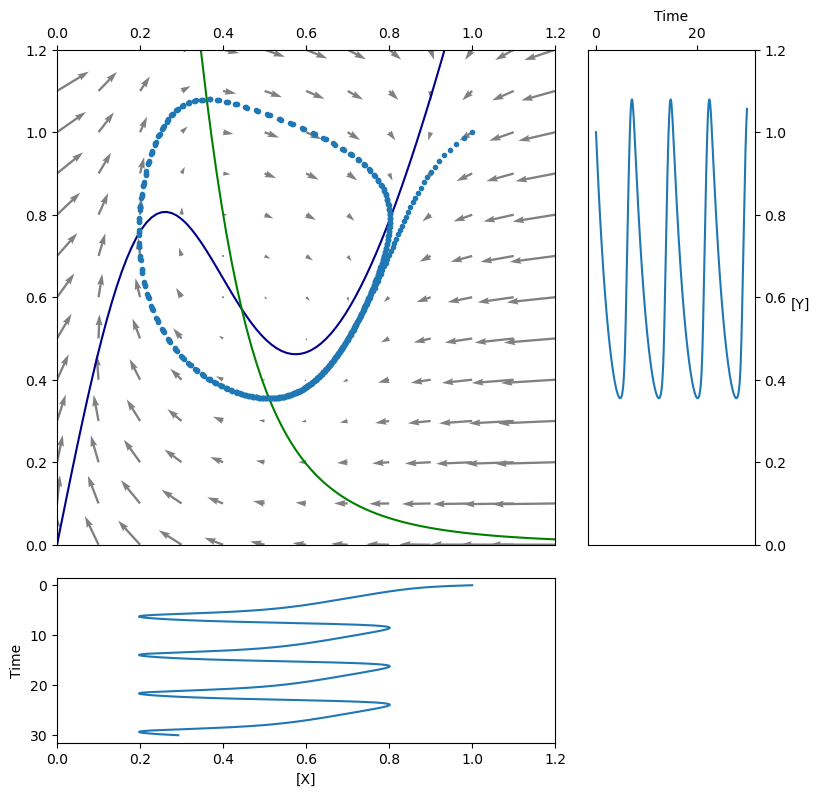

In [5]:
# your solution 2.2

# RHS function of the relaxation oscillator
def rhs_ro(XY, t, bX, bY, n, m, K, L, aX, aY):
    X,Y = XY
    dXdt = Y + bX*(X**n)/(X**n + K**n) - aX*X
    dYdt = bY*(L**m)/(X**m + L**m) - aY*Y
    return dXdt, dYdt 


# parameters
bX = 4
bY = 1
aX = 5
aY = 0.3
K = 0.5
L = 0.3
n = 3
m = 4


# Initialize the figures
p, ax = my_axes()

# Vector field
X_vec = np.linspace(0, 1.2, 13)
Y_vec = np.linspace(0, 1.2, 13)
X, Y = np.meshgrid(X_vec, Y_vec)
dXdt, dYdt = rhs_ro([X, Y], None, bX, bY, n, m, K, L, aX, aY)

ax[0][0].quiver(X, Y, dXdt, dYdt, color="gray")

# Nullclines
X_vec2 = np.linspace(0, 1.2, 101)
Y_vec2 = np.linspace(0, 1.2, 101)
X2, Y2 = np.meshgrid(X_vec2, Y_vec2)
dXdt2, dYdt2 = rhs_ro([X2, Y2], None, bX, bY, n, m, K, L, aX, aY)

ax[0][0].contour(X2, Y2, dXdt2, [0], colors=["darkblue"])
ax[0][0].contour(X2, Y2, dYdt2, [0], colors=["green"])

# Trajectories
tspan = np.linspace(0, 30, 601)
args = (bX, bY, n, m, K, L, aX, aY)

X0 = Y0 = 1
sol = odeint(rhs_ro, [X0, Y0], tspan, args)
ax[0][0].plot(sol[:, 0], sol[:, 1], '.')
ax[0][1].plot(tspan, sol[:, 1])
ax[1][0].plot(sol[:, 0], tspan)

plt.show()

__2.3 (2')__ Repeat 2.1 but with $\beta_Y = 2$. 
You should integrate the trajectory for a long enough time so that it settles down.
What _qualitative_ change do you see in the system?

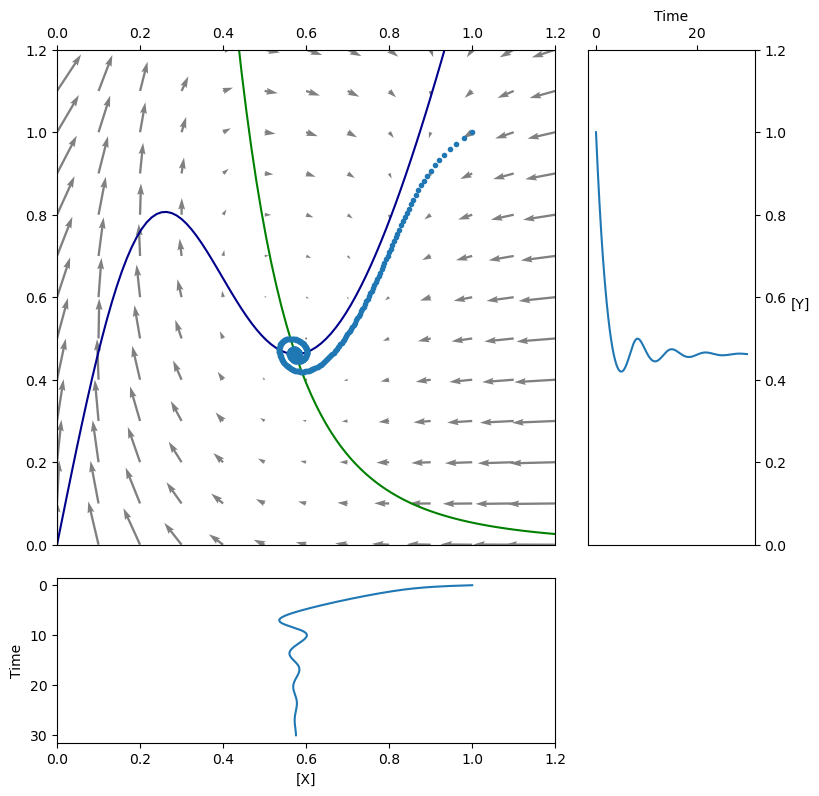

In [6]:
# your solution 2.3


# parameters
bX = 4
bY = 2
aX = 5
aY = 0.3
K = 0.5
L = 0.3
n = 3
m = 4


# Initialize the figures
p, ax = my_axes()

# Vector field
X_vec = np.linspace(0, 1.2, 13)
Y_vec = np.linspace(0, 1.2, 13)
X, Y = np.meshgrid(X_vec, Y_vec)
dXdt, dYdt = rhs_ro([X, Y], None, bX, bY, n, m, K, L, aX, aY)

ax[0][0].quiver(X, Y, dXdt, dYdt, color="gray")

# Nullclines
X_vec2 = np.linspace(0, 1.2, 101)
Y_vec2 = np.linspace(0, 1.2, 101)
X2, Y2 = np.meshgrid(X_vec2, Y_vec2)
dXdt2, dYdt2 = rhs_ro([X2, Y2], None, bX, bY, n, m, K, L, aX, aY)

ax[0][0].contour(X2, Y2, dXdt2, [0], colors=["darkblue"])
ax[0][0].contour(X2, Y2, dYdt2, [0], colors=["green"])

# Trajectories
tspan = np.linspace(0, 30, 601)
args = (bX, bY, n, m, K, L, aX, aY)

X0 = Y0 = 1
sol = odeint(rhs_ro, [X0, Y0], tspan, args)
ax[0][0].plot(sol[:, 0], sol[:, 1], '.')
ax[0][1].plot(tspan, sol[:, 1])
ax[1][0].plot(sol[:, 0], tspan)

plt.show()

__Edit the cell to include your answer__

The system now loses its limit cycle. The only attractor is a stable steady state.

__2.4 (2')__ Repeat 2.1 but with $\beta_Y = 0.2$ and $L = 0.8$. You should see that the system becomes bistable!

Strategically pick 4 different initial conditions from where the system will end up at different steady states.
Solve trajectories from these initial conditions and plot them
in the plase plane, the X-t space and the Y-t space. Please plot everything (the vector field, the trajectories, etc.)
in one multi-panel figure.

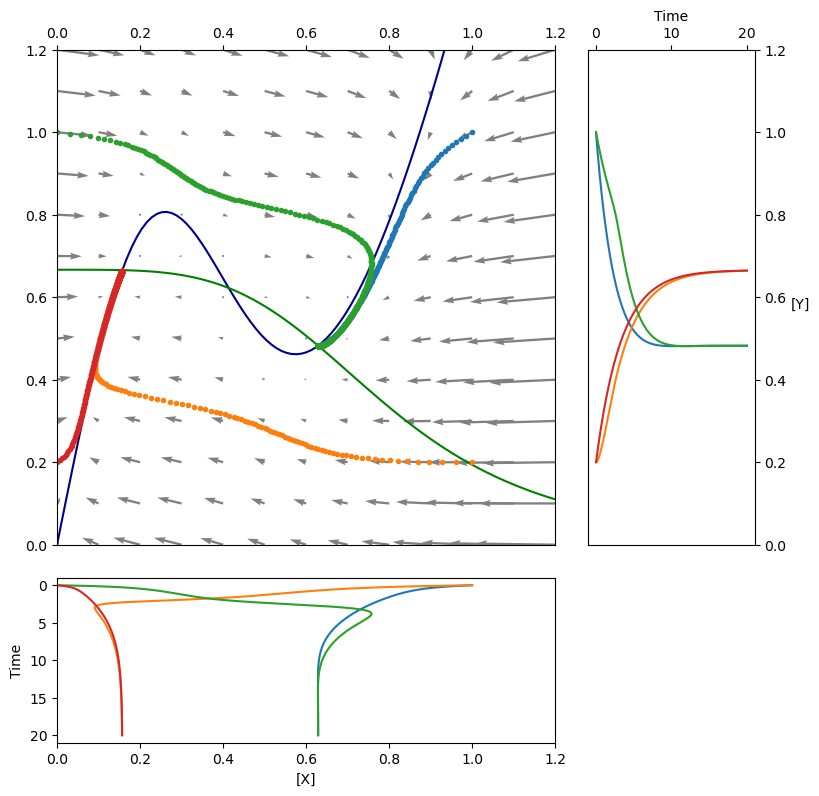

In [7]:
# your solution 2.4

# parameters
bX = 4
bY = 0.2
aX = 5
aY = 0.3
K = 0.5
L = 0.8
n = 3
m = 4


# Initialize the figures
p, ax = my_axes()

# Vector field
X_vec = np.linspace(0, 1.2, 13)
Y_vec = np.linspace(0, 1.2, 13)
X, Y = np.meshgrid(X_vec, Y_vec)
dXdt, dYdt = rhs_ro([X, Y], None, bX, bY, n, m, K, L, aX, aY)

ax[0][0].quiver(X, Y, dXdt, dYdt, color="gray")

# Nullclines
X_vec2 = np.linspace(0, 1.2, 101)
Y_vec2 = np.linspace(0, 1.2, 101)
X2, Y2 = np.meshgrid(X_vec2, Y_vec2)
dXdt2, dYdt2 = rhs_ro([X2, Y2], None, bX, bY, n, m, K, L, aX, aY)

ax[0][0].contour(X2, Y2, dXdt2, [0], colors=["darkblue"])
ax[0][0].contour(X2, Y2, dYdt2, [0], colors=["green"])

# Trajectories
tspan = np.linspace(0, 20, 601)
args = (bX, bY, n, m, K, L, aX, aY)

XY0_vec = [[1, 1], [1, 0.2], [0, 1], [0, 0.2]]
for X0, Y0 in XY0_vec:
    sol = odeint(rhs_ro, [X0, Y0], tspan, args)
    ax[0][0].plot(sol[:, 0], sol[:, 1], '.')
    ax[0][1].plot(tspan, sol[:, 1])
    ax[1][0].plot(sol[:, 0], tspan)

plt.show()

## Part 3 The Relaxation Oscillator as a Stochastic Pulse Generator

Now we will add noise to the relaxation oscillator.

$$
\begin{align}
\frac{dX}{dt} &= \gamma Y + \beta_x \frac{X^n}{X^n + K^n} - \alpha_x X + A \xi(t)\\
\frac{dY}{dt} &= \beta_y \frac{L^m}{X^m + L^m} - \alpha_y Y + A \xi(t)
\end{align}
$$

Where $\xi(t)$ is a random variable with mean = 0 and variance = 1 sampled from Gaussian. This means that every time $\xi(t)$ is sampled by the differential equation solver the production rate is perturbed by a different random number. $A$ is the noise strength i.e. how big the fluctuations are. When $A = 0$, the model falls back to a deterministic one. You can revisit Lab 4 to refresh your memory.

We are also adding an additional parameter $\gamma$ as a knob to turn the positive regulation strength from $Y$ to $X$.

Please use the following parameters for coding tasks:

$$
\begin{align}
\gamma &= 10\\
\beta_x &= 30\\
\beta_y &= 3\\
\alpha_x &= 40\\
\alpha_y &= 1.5\\
K &= 0.6\\
L &= 0.47\\
n &= 5\\
m &= 3
\end{align}
$$



__3.1 (3') Close initial conditions can give very different dynamics.__ 

Write a new RHS function for the relaxation oscillator with the new parameter $\gamma$. 

Then, use `my_axes` to generate a blank phase plane and blank X-t and Y-t plots.
In the phase plane, plot the vector field and the X- and Y-nullclines using your new RHS function.

Solve two __deterministic__ trajectories starting from $X_0 = 0.4,\,Y_0 = 1.3$
and $X_0 = 0.4, \,Y_0 = 1.25$.
Integrate the trajectories for a long enough time for them to settle at the attractor.
Plot the trajectories in the phase plane, the X-t plot and the Y-t plot.
Set the axis limits for both X and Y from 0 to 1.5.

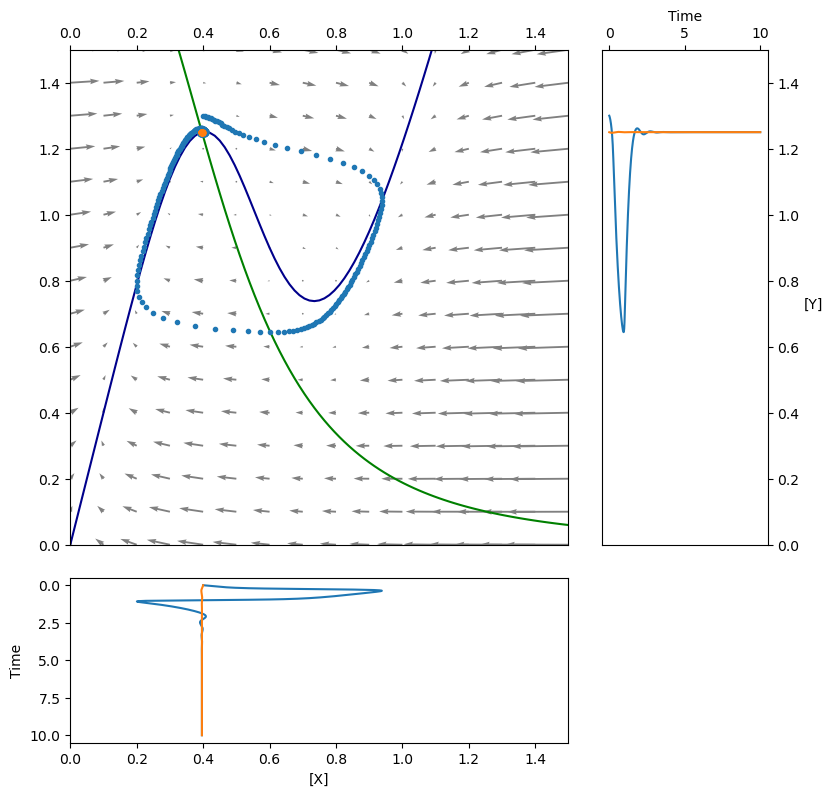

In [8]:
# your solution 3.1

# RHS function of the relaxation oscillator
def rhs_ro2(XY, t, gamma, bX, bY, n, m, K, L, aX, aY):
    X,Y = XY
    dXdt = gamma*Y + bX*(X**n)/(X**n + K**n) - aX*X
    dYdt = bY*(L**m)/(X**m + L**m) - aY*Y
    return dXdt, dYdt 

# parameters
gamma = 10
bX = 30
bY = 3
aX = 40
aY = 1.5
K = 0.6
L = 0.47
n = 5
m = 3

# Initialize the figures
p, ax = my_axes()

# Vector field
X_vec = np.linspace(0, 1.5, 16)
Y_vec = np.linspace(0, 1.5, 16)
X, Y = np.meshgrid(X_vec, Y_vec)
dXdt, dYdt = rhs_ro2([X, Y], None, gamma, bX, bY, n, m, K, L, aX, aY)

ax[0][0].quiver(X, Y, dXdt, dYdt, color="gray")

# Nullclines
X_vec2 = np.linspace(0, 1.5, 101)
Y_vec2 = np.linspace(0, 1.5, 101)
X2, Y2 = np.meshgrid(X_vec2, Y_vec2)
dXdt2, dYdt2 = rhs_ro2([X2, Y2], None, gamma, bX, bY, n, m, K, L, aX, aY)

ax[0][0].contour(X2, Y2, dXdt2, [0], colors=["darkblue"])
ax[0][0].contour(X2, Y2, dYdt2, [0], colors=["green"])

# Trajectories
tspan = np.linspace(0, 10, 1001)
args = (gamma, bX, bY, n, m, K, L, aX, aY)

XY0_vec = [[0.4, 1.3], [0.4, 1.25]]
for X0, Y0 in XY0_vec:
    sol = odeint(rhs_ro2, [X0, Y0], tspan, args)
    ax[0][0].plot(sol[:, 0], sol[:, 1], '.')
    ax[0][1].plot(tspan, sol[:, 1])
    ax[1][0].plot(sol[:, 0], tspan)

plt.show()

__3.2 (3') Stochastic Pulse Generator.__ 
As you should've seen in 3.1, the dependence of the dynamics on the initial condition is quite _sensitive_ in the neighborhood of
the stable steady state .
This suggests that noise can quite drastically change the dynamics around the steady state.

In the phase plane, plot the vector field and the nullclines same as 3.1. Solve a noisy trajectory starting
from $X_0 = 0.4, \,Y_0 = 1.25$ using stochastic differential equations.
Similar to Lab 4, you will use this `sdeint_wrapper` function defined below to access the SDE solver.
Use noise strength $A = 0.04$ and a time span from 0 to 20.
Overlay your noisy trajectory in the phase plane, and plot it in the X-t and the Y-t space.

Feel free to try different noise strengths and see how the dynamics changes.

In [9]:
from sdeint import itoint
import numpy as np

def sdeint_wrapper(rhs, u0, tspan, A, args):
    # ensure the derivatives are an np array
    sol = itoint(lambda x, t: np.array(rhs(x, t, *args)),
                 # only allow independent noise (as a diagonal vector)
                 # if the state variable is 1D, use a scalar A
                 lambda x, t: A if not hasattr(x, "__len__") else np.diag(A*x**0),
                 u0, tspan)
    return sol

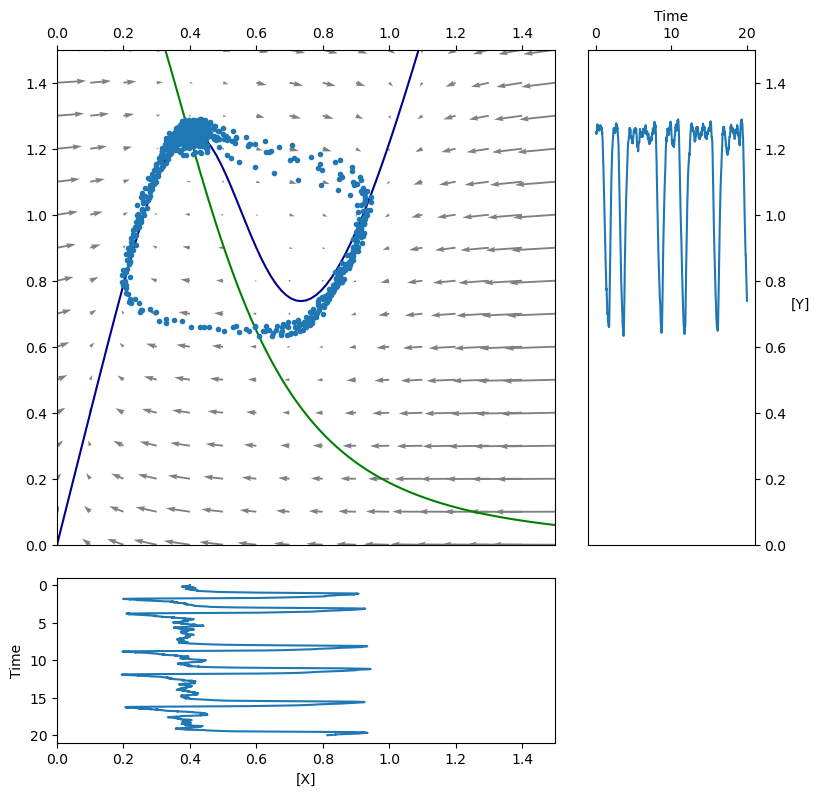

In [10]:
# your solution 3.2

# parameters
A = 0.04

# Initialize the figures
p, ax = my_axes()

# Vector field
ax[0][0].quiver(X, Y, dXdt, dYdt, color="gray")

# Nullclines
ax[0][0].contour(X2, Y2, dXdt2, [0], colors=["darkblue"])
ax[0][0].contour(X2, Y2, dYdt2, [0], colors=["green"])

# Trajectories
tspan = np.linspace(0, 20, 1001)
args = (gamma, bX, bY, n, m, K, L, aX, aY)

X0 = 0.4
Y0 = 1.25
sol = sdeint_wrapper(rhs_ro2, [X0, Y0], tspan, A, args)
ax[0][0].plot(sol[:, 0], sol[:, 1], '.')
ax[0][1].plot(tspan, sol[:, 1])
ax[1][0].plot(sol[:, 0], tspan)

plt.show()

__3.3 (1')__ Choose which factor determines the average frequency of the pulses.

A. The noise strength

B. The initial condition

C. The maximum integration time

D. The color of my trajectory

__Edit this cell to include your answer__

A